<a href="https://colab.research.google.com/github/yutaro-tanaka-yt2705/machine_learning_learning/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#Import Libraries
## Standard
import numpy as np 
import os
import pandas as pd
## Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
## Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Import Google Drive and enable Colab access to files.
#Copy URL, log into Google account, and copy the authorization code.
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


Factors Considered are as follows. 

1. age
2. sex (1 = male, 0 = female)
3. chest pain type (4 values)
4. resting blood pressure (in mmHg)
5. serum cholestoral (in mg/dl)
6. fasting blood sugar (> 120 mg/dl, 1 = True, 0 = False)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina (1 = True, 0 = False)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

The goal column is in the "Target" column. (1 = True, 0 = False)


In [ ]:
#Read in file. File obtained from Kaggle, and original data from UCI Repository. 
heart = pd.read_csv('/gdrive/MyDrive/000_Personal_Projects/011_Machine_Learning/002_Heart_Disease/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#303 patients, 14 factors. 
heart.shape

(303, 14)

In [41]:
#Differentiate the Training columns, and the Answer columns. 
X = heart.drop(["target"], axis = 1)
Y = heart["target"]
print(X.columns)
print(Y)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [42]:
#Split the dataset into training and testing data.
np.random.seed(seed = 4)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=4)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(242, 13) (61, 13) (242,) (61,)


------
## Linear Regression


In [21]:
#Define Linear Regression Model. 
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#This is the variance. 1 means perfect prediction. 
lin_regr.score(X_test, y_test)

0.5732283996028233

In [ ]:
#Obtain the Intercept and Coefficient of the model. 
print('Intercept:', lin_regr.intercept_)
print('Coefficients:', lin_regr.coef_)

Intercept: 0.8849906825999314
Coefficients: [-8.06179722e-04 -2.03018438e-01  1.10510637e-01 -2.58045705e-03
 -1.90550318e-04  3.24084004e-02  5.78314626e-02  2.52069678e-03
 -1.09871320e-01 -7.26383099e-02  9.23184440e-02 -1.00066851e-01
 -1.05975671e-01]


In [14]:
y_pred = lin_regr.predict(X_test)
print(y_pred)

[ 0.65362364  0.13463934  0.56577072  1.09695165  0.72085941  0.45936567
  0.30622003  0.90914209  0.64057942  0.74373388  0.66665856  1.01501311
  0.70467338  0.38159741  0.74929231 -0.1882605   0.82594281  0.82852703
  0.21037853  0.55646895  0.88198342  0.65227051 -0.03092103  0.60149248
  0.61652152  0.08933221  0.44972144  1.06957839  0.51872374 -0.09052283
  0.35714781  0.51969101  1.12655386  0.7291498   0.63303792  0.97490162
  0.88788927  0.66826987  0.53488295 -0.13658203 -0.05859623  0.20306303
  0.14872081  0.6817378   0.86447052  0.69006129  0.09870245  0.42495043
  0.21156297  0.87877657  0.04555199  0.55308421  0.19766273  0.49410283
  0.78480745  1.2758102   0.87577391  0.84698353 -0.31209989  0.09759849
  1.04582078]


In [16]:
#Obtain the MAE, MSE, RMSE scores of the model.
print(mae(y_test, y_pred))
print(mse(y_test, y_pred))
print(np.sqrt(mse(y_test, y_pred)))

0.2672822038697817
0.10322344540646572
0.3212840571931102


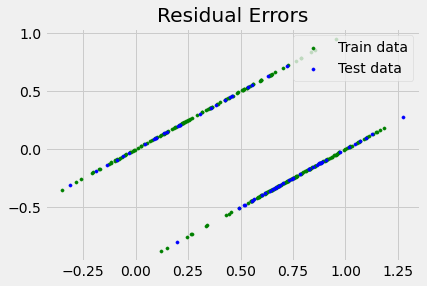

In [ ]:
#Plot for residual error 
  
## setting plot style 
plt.style.use('fivethirtyeight') 
  
## plotting residual errors in training data 
plt.scatter(lin_regr.predict(X_train), lin_regr.predict(X_train) - y_train, 
            color = "green", s = 10, label = 'Train data') 
  
## plotting residual errors in test data 
plt.scatter(lin_regr.predict(X_test), lin_regr.predict(X_test) - y_test, 
            color = "blue", s = 10, label = 'Test data') 
  
## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Residual Errors") 
  
## function to show plot 
plt.show() 

--------
## Logistic Regression

In [43]:
# Try preprocessing the data
preprocessed = make_pipeline(StandardScaler(), LogisticRegression())
preprocessed.fit(X_train, y_train)
preprocessed.score(X_test, y_test)

0.8688524590163934

In [44]:
#Set Logistic Regression Model. 
log_regr = LogisticRegression(max_iter=1000)
log_regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
#The mean accuracy of the given data. 
log_regr.score(X_test, y_test)

0.9344262295081968

In [32]:
print('Intercept:', log_regr.intercept_)
print('Coefficients:', log_regr.coef_)

Intercept: [3.08549427]
Coefficients: [[-0.00430894 -1.3447673   0.76647285 -0.02058626 -0.00237708  0.12357702
   0.45360095  0.01787072 -0.66398049 -0.61785122  0.54849734 -0.70030345
  -0.71506842]]


In [ ]:
y_preds = log_regr.predict(X_test)
print(y_preds)

[1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1]


In [17]:
#Obtain the MAE, MSE, RMSE scores of the model.
print(mae(y_test, y_pred))
print(mse(y_test, y_pred))
print(np.sqrt(mse(y_test, y_pred)))

0.2672822038697817
0.10322344540646572
0.3212840571931102


In [ ]:
cf_matrix = confusion_matrix(y_test, y_preds)
print(cf_matrix)

[[22  3]
 [ 1 35]]


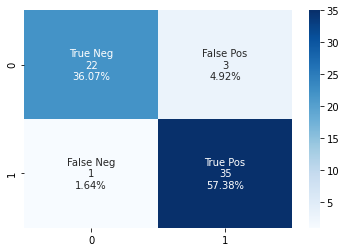

In [ ]:
group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy_score(y_test, y_preds)

0.9344262295081968

------
## Random Forest Regressor

In [50]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

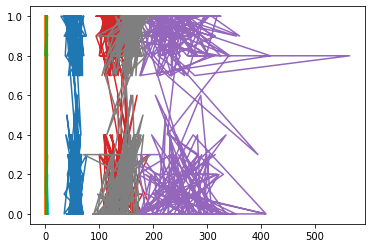

In [53]:
plt.plot(X, regressor.predict(X))

-------
## SVM Regression

In [ ]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=3)
y_rbf = svr_rbf.fit(X, Y).predict(X)
y_lin = svr_lin.fit(X, Y).predict(X)
y_poly = svr_poly.fit(X, Y).predict(X)

In [ ]:
test_rbf = svr_rbf.predict(test_X)
test_lin = svr_lin.predict(test_X)
test_poly = svr_poly.predict(test_X)